In [1]:
# loading libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize']=(10.0,8.0)
import seaborn as sns
from scipy import stats
from scipy.stats import norm

In [2]:
#loading data
train=pd.read_csv("C:/Users/sri/Desktop/Housing/train.csv")
test=pd.read_csv("C:/Users/sri/Desktop/Housing/test.csv")

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
print('The train dat has {0} rows and {1} columns'.format(train.shape[0],train.shape[1]))
print('The test data has {0} rows and {1} columns'.format(test.shape[0],test.shape[1]))

The train dat has 1460 rows and 81 columns
The test data has 1459 rows and 80 columns


In [5]:
#checking missing values
train.columns[train.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [6]:
#missing value counts in each of these columns
miss=train.isnull().sum()/len(train)
miss=miss[miss>0]
miss.sort_values(inplace=True)
miss

Electrical      0.000685
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtFinType1    0.025342
BsmtExposure    0.026027
BsmtFinType2    0.026027
GarageCond      0.055479
GarageQual      0.055479
GarageFinish    0.055479
GarageType      0.055479
GarageYrBlt     0.055479
LotFrontage     0.177397
FireplaceQu     0.472603
Fence           0.807534
Alley           0.937671
MiscFeature     0.963014
PoolQC          0.995205
dtype: float64

AttributeError: module 'seaborn' has no attribute 'plt'

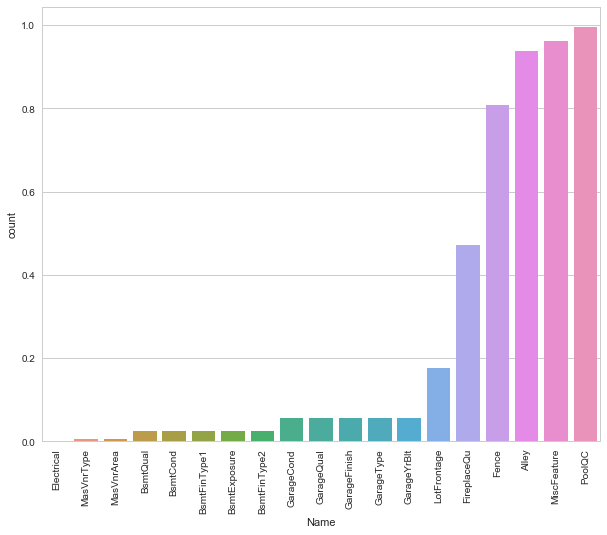

In [7]:

#visualising missing values
miss = miss.to_frame()
miss.columns = ['count']
miss.index.names = ['Name']
miss['Name'] = miss.index

#plot the missing value count
sns.set(style="whitegrid", color_codes=True)
sns.barplot(x = 'Name', y = 'count', data=miss)
plt.xticks(rotation = 90)
sns.plt.show()


In [ ]:
#let's check the distribution of target value

#SalesPrice

sns.distplot(train['SalePrice'])  #distplot helps to flexibly plot the univariate distribution of observations

#This function combines the matplotlib hist function (with automatic calculation of a good default bin size) with the seaborn kdeplot() and rugplot() functions. 
#It can also fit scipy.stats distributions and plot the estimated PDF over the data.

#kde plot:show a univariate or a bivariate distribution with a kernel density estimate
#rugplot:draw small vertical lines to show each observation in a distribution



In [ ]:
#We see that the target variable SalePrice has a right-skewed distribution
# we ll need to log transfrom this variable so that it becomes normally distributed
# A normally distributed target variable helps in better modelling the relationship between target and independant variables
#We can also confirm this skewed behaviour using skewness metric

In [ ]:
#skewness

print("The skewness of SalePrice is {}".format(train['SalePrice'].skew()))

#You dont get value printed if you don't provide {}

In [ ]:
#let's log transform this variable and see if the variable distribution becomes normal
# now transforming the target variable
target=np.log(train['SalePrice'])
print('Skewness is {}'.format(target.skew()))
sns.distplot(target)


In [ ]:
# log normalization has helped in changing the skew distribution to normal
#Since we have 80 variables, we can't look at each of them
# Hence we ll look at some variables who has correlation with target variable
# now we will try to separate numeric and categorical variables

In [9]:
#separate variables into new data frames

numeric_data=train.select_dtypes(include=[np.number])
cat_data=train.select_dtypes(exclude=[np.number])
print("there are numeric {} and categoric coulmns {} in train data".format(numeric_data.shape[1],cat_data.shape[1]))

there are numeric 38 and categoric coulmns 43 in train data


In [ ]:
#we donot need the id so delete it

del numeric_data['Id']

In [ ]:
# Now we have to observe the correlated variables in numeric data
#Out of 38 numeric columns, I presume some of them should have correlation between them.
#If we found such data, we will delete them as there is no big use with them


In [ ]:
#correlation plot

corr=numeric_data.corr()
sns.heatmap(corr)          #heat map in seaborn is used to plot rectangular data as color matrix

In [ ]:
#Notice the last row of this map
#As you can see some variables seem to be strongly correlated with target variable
#Here a numeric correlation number will make us understand the graph better

In [ ]:
print(corr['SalePrice'].sort_values(ascending=False)[:15],'\n')#prints top 15 values
print('--------------------------------------------------')
print(corr['SalePrice'].sort_values(ascending=False)[-5:])  #last 5 values

In [ ]:
#Here we see that overallQual has 79% correlation with the target variable. 
#OverallQual means the quality of material used in construction of the building. Hence correlation makes sense
#GrliveArea has 71% correlation and grliveArea means area of living
# The following variables show that people also care if the house has garage area,size of basement area etc

In [ ]:
#Let's check the overallQual in detail

train['OverallQual'].unique()

In [ ]:
#We can understand that overallQual is measured in 1 to 10 rating scale
#Hence we can treat it as ordinal variable
# Let's check the median Sales price of houses with respect to OverAllQuall
#We are using median because target variable is skewed. Skewed variables has outliers and median is robust to outliers

In [10]:
# We can create such aggregate tables using pandas pivot table very easily
# Let's check the median of price and plot it

pivot=train.pivot_table(index='OverallQual',values='SalePrice',aggfunc=np.median)
pivot

,SalePrice
OverallQual,
1,50150
2,60000
3,86250
4,108000
5,133000
6,160000
7,200141
8,269750
9,345000


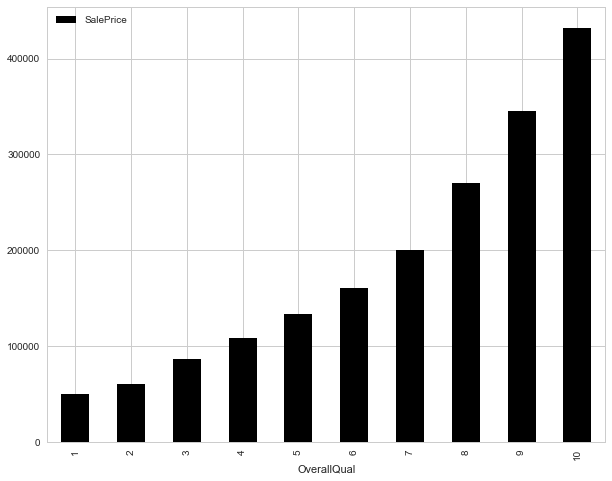

In [11]:
#Let's plot the table and understand median behavior using bar graph

pivot.plot(kind='bar',color='black')

In [ ]:
# This behavior is quite normal
# As the over quality increases price also increases
# Let's visualise the next correlated variable

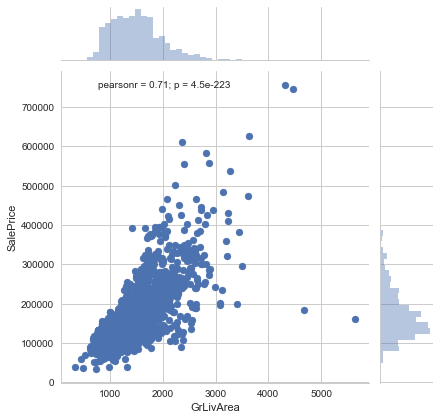

In [12]:
sns.jointplot(x=train['GrLivArea'],y=train['SalePrice'])

In [ ]:
#As seen above,here also we see a direct correlation between living area and SalePrice
# However we can spot an outlier value GrLivArea>5000
# Outliers play a significant role in spoiling a model's performance
# Hence we have to get rid of it
# Now let's move forward and explore categorical variables
# The simplest way to understand categorical variable is by using describe()

In [ ]:
cat_data.describe()

In [13]:
# Now let's find the median of SalePrice of a house based on SaleCondition

sp_pivot=train.pivot_table(index='SaleCondition',values='SalePrice',aggfunc=np.median)
sp_pivot

,SalePrice
SaleCondition,
Abnorml,130000
AdjLand,104000
Alloca,148145
Family,140500
Normal,160000
Partial,244600


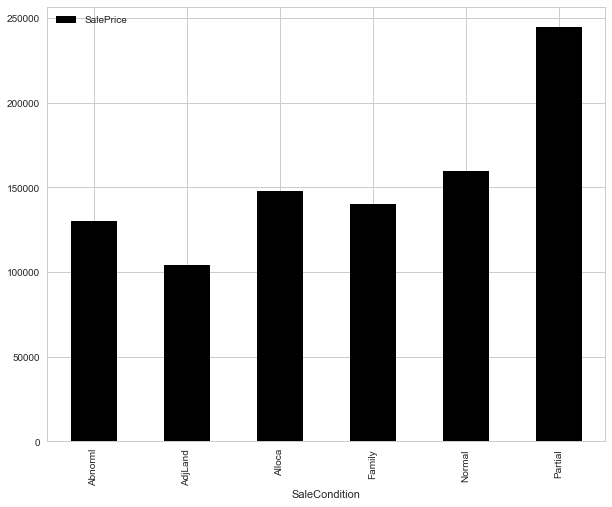

In [14]:
sp_pivot.plot(kind='bar',color='black')

In [ ]:
# We will see that SaleCondition Partial has the highest mean Price
# Due to lack of data, we cannot generate many insights from this data so let's move forward
# Like we used correlation to determine the influence of numeric variables on SalePrice
# Let's use ANOVA test to understand the correlation between categorical variables and SalePrice
# ANOVA test is a statistical technique used to determine if there exists a significal difference in the mean of groups
# For example, let's say we have two variables A and B. Each of these variables has 3 levels (a1,a2,a3 and b1,b2,b3). 
# If the mean of these variables with respect to the target variable is same
# ANOVA  test will capture this behavior and we can safely remove them


In [ ]:
# While using ANOVA we have the following hypothesis
# Ho- There exists no significant difference between the groups
# Ha- There exists a significant difference between the groups
# Now let's define a function which calculates p values
# From those p values, we'll calculate a disparity score
# Higher the disparity score, better the feature in predicting SalePrice

D:\akhila\python\anaconda\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
D:\akhila\python\anaconda\lib\site-packages\scipy\stats\stats.py:2958: RuntimeWarning: invalid value encountered in double_scalars
  ssbn += _square_of_sums(a - offset) / float(len(a))


<module 'matplotlib.pyplot' from 'D:\\akhila\\python\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

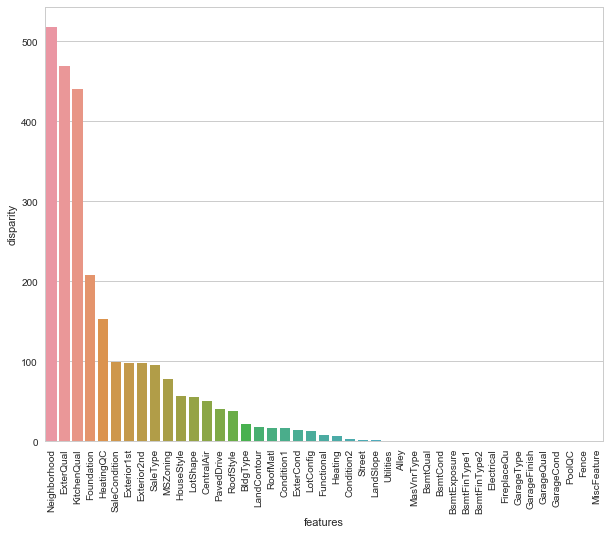

In [15]:
cat= [f for f in train.columns if train.dtypes[f] == 'object']
def anova(frame):
    anv=pd.DataFrame()
    anv['features']=cat
    pvals=[]
    for c in cat:
        samples=[]
        for cls in frame[c].unique():
            s=frame[frame[c]==cls]['SalePrice'].values
            samples.append(s)
        pval=stats.f_oneway(*samples)[1]
        pvals.append(pval)
    anv['pval']=pvals
    return anv.sort_values('pval')

cat_data['SalePrice']=train.SalePrice.values
k= anova(cat_data)
k['disparity']= np.log(1./k['pval'].values)
sns.barplot(data=k, x = 'features', y='disparity') 
plt.xticks(rotation=90) 
plt 

In [ ]:
# We can see that among all categorical variables, Neighbourhood is the most important feature followed by ExternQual,KitchenQual
# It means people also consider the neighbourhood to buy a house
# Finally to get a quick glance, lets plot histograms for all numeric data to determine their skewness
# Boxplot for all the categorical variables

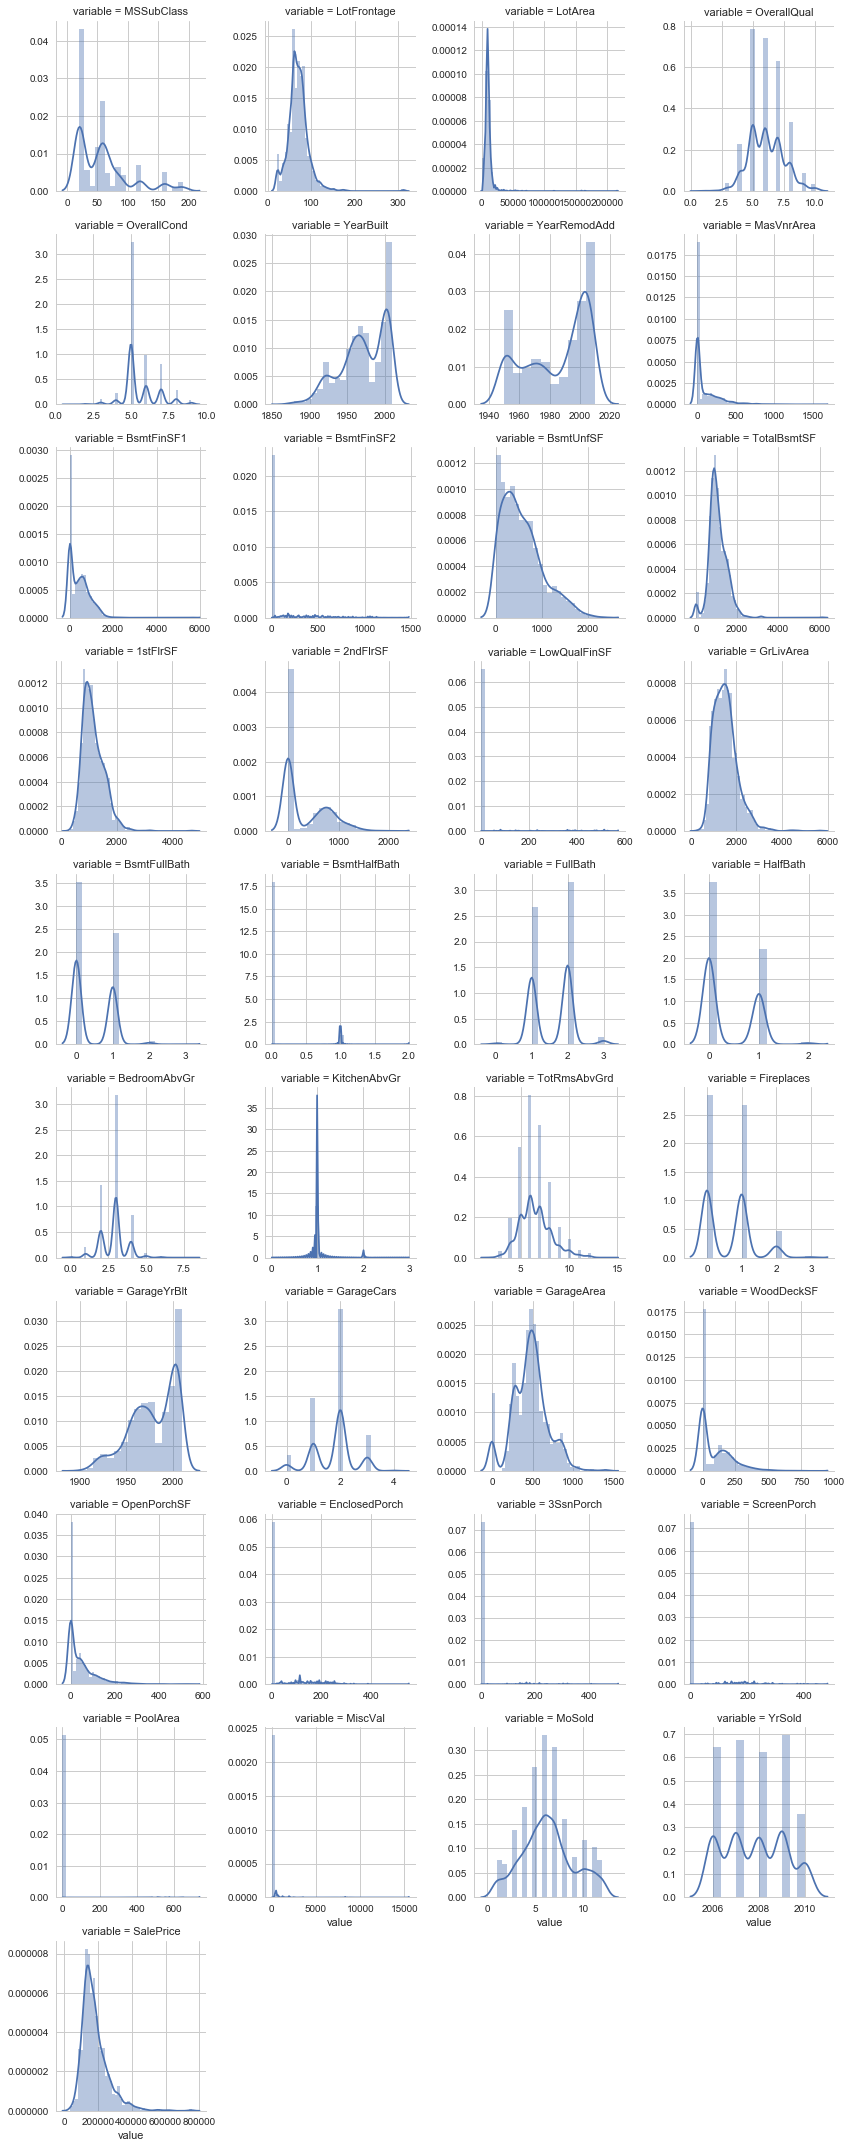

In [16]:
# create numeric plots

num= [f for f in train.columns if train.dtypes[f]!= 'object']
num.remove('Id')
nd = pd.melt(train, value_vars = num)         #Unpivots a DataFrame from wide format to long format, optionally leaving identifier variables set.
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
# FacetGrid is an object that links a Pandas DataFrame to a matplotlib figure with a particular structure.
n1 = n1.map(sns.distplot, 'value')
n1

In [ ]:
# most of them are right skewed

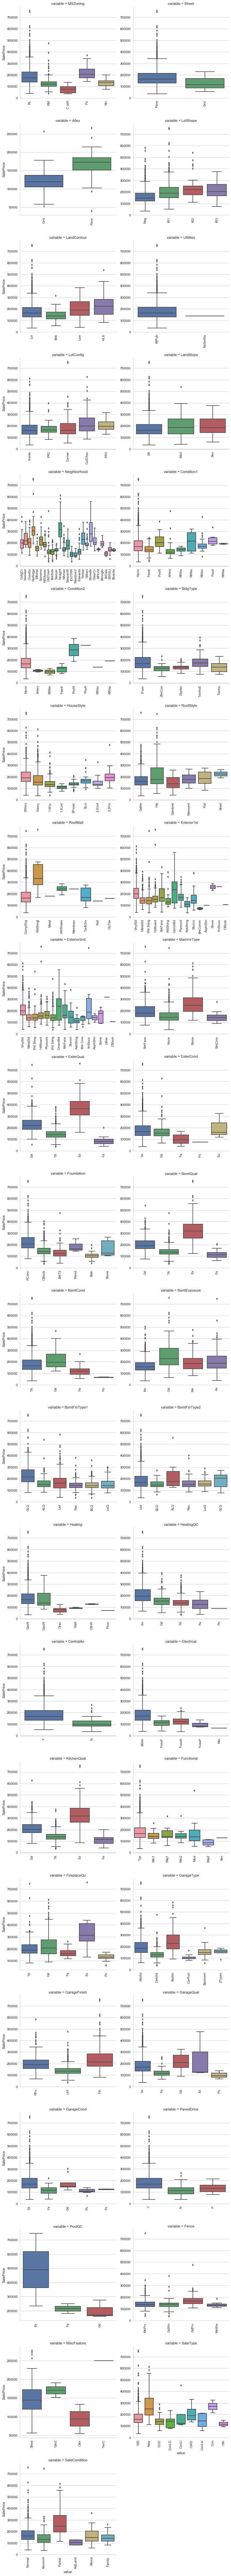

In [17]:
# BoxPlots for visualizing categorised data

def boxplot(x,y,**kwargs):
    sns.boxplot(x=x,y=y)
    x=plt.xticks(rotation=90)

cat = [f for f in train.columns if train.dtypes[f] == 'object']

p = pd.melt(train, id_vars='SalePrice', value_vars=cat)
g = sns.FacetGrid (p, col='variable', col_wrap=2, sharex=False, sharey=False, size=5)
#  FacetGrid is an object that links a Pandas DataFrame to a matplotlib figure with a particular structure.
g = g.map(boxplot, 'value','SalePrice')
g

In [ ]:
# Here, we can see that most of the variables possess outlier values.
# It would take so long time to treat these outlier values one by one
# Hence Machine learning algorithm comes into picture
# As we know tree based algorithm is robust to outliers

### DATA PREPROCESSSING

In [ ]:
# In this stage we will deal with outliers, impute missing values, encode variables 
# take every possible step to remove incosistencies from data
# If you remember, we discovered that the variable GrLivArea has outlier values
# Precisely one point crossed 5000. Let's remove that


In [18]:
#removing outliers

train.drop(train[train['GrLivArea']>4000].index,inplace=True)
train.shape #before doing this train had 1460 rows

(1456, 81)

In [19]:
#lets determine the missing values in test data
#missing value counts in each of these columns
miss=test.isnull().sum()/len(test)
miss=miss[miss>0]
miss.sort_values(inplace=True)
miss

TotalBsmtSF     0.000685
GarageArea      0.000685
GarageCars      0.000685
KitchenQual     0.000685
BsmtUnfSF       0.000685
BsmtFinSF2      0.000685
BsmtFinSF1      0.000685
SaleType        0.000685
Exterior1st     0.000685
Exterior2nd     0.000685
Functional      0.001371
Utilities       0.001371
BsmtHalfBath    0.001371
BsmtFullBath    0.001371
MSZoning        0.002742
MasVnrArea      0.010281
MasVnrType      0.010966
BsmtFinType2    0.028787
BsmtFinType1    0.028787
BsmtQual        0.030158
BsmtExposure    0.030158
BsmtCond        0.030843
GarageType      0.052090
GarageFinish    0.053461
GarageQual      0.053461
GarageCond      0.053461
GarageYrBlt     0.053461
LotFrontage     0.155586
FireplaceQu     0.500343
Fence           0.801234
Alley           0.926662
MiscFeature     0.965045
PoolQC          0.997944
dtype: float64

In [20]:
test.describe()



,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [ ]:
# min 0.00 indicates the missing values in data

In [ ]:
# In row 666, in the test data,
# it was found that information in variables related to 'Garage' (GarageQual, GarageCond, GarageFinish, GarageYrBlt) is missing.
# Let's impute them using mode of these respective variables

In [ ]:
# Imputing refers to using a model to replace missing values
# There are many options we could consider when replacing a missing value

# A constant value that has meaning within the domain, such as 0, distinct from all other values.
# A value from another randomly selected record.
# A mean, median or mode value for the column.
# A value estimated by another predictive mode

In [21]:
#imputing using mode
test.loc[666, 'GarageQual'] = "TA" 
#stats.mode(test['GarageQual']).mode
test.loc[666, 'GarageCond'] = "TA" 
#stats.mode(test['GarageCond']).mode
test.loc[666, 'GarageFinish'] = "Unf" 
#stats.mode(test['GarageFinish']).mode
test.loc[666, 'GarageYrBlt'] = "1980" 
#np.nanmedian(test['GarageYrBlt'])` 

In [22]:
# In row 1116, in test data, all garage variables are NA except GarageType. Let's mark it NA as well.
test.loc[1116, 'GarageType'] = np.nan

In [ ]:
# Now we ll encode all categorical variables
# This is required because most ml algorithms doesn't accept categorical values
# Instead they are expected to be converted to numerical
# LabelEncoder function from sklearn is used to encode variables

In [23]:
# importing function
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
def factorize(data,var,fill_na=None):
    if fill_na is not None:
        data[var].fillna(fill_na, inplace=True)
    le.fit(data[var])
    data[var]=le.transform(data[var])
    return data

In [ ]:
# This function imputes the blank levels with mode values
# The mode values are to be entered manually
# Now let's impute the missing values in LotFrontage variable using the median value of LotFrontage by neighbourhood
# Lotfrontage is linear feet of street connected to property
# To do this we have to combine our train data and test data so that we can modify both the data sets easily

In [24]:
# combine the data set

alldata=train.append(test)
alldata.shape

(2915, 81)

In [25]:
# impute lotfrontage with median of neighbourhood

lot_frontage_by_neighborhood=train['LotFrontage'].groupby(train['Neighborhood'])

for key,group in lot_frontage_by_neighborhood:
    idx=(alldata['Neighborhood']==key) & (alldata['LotFrontage'].isnull())
    alldata.loc[idx,'LotFrontage']==group.median()


In [26]:
train['LotFrontage']

0        65.0
1        80.0
2        68.0
3        60.0
4        84.0
5        85.0
6        75.0
7         NaN
8        51.0
9        50.0
10       70.0
11       85.0
12        NaN
13       91.0
14        NaN
15       51.0
16        NaN
17       72.0
18       66.0
19       70.0
20      101.0
21       57.0
22       75.0
23       44.0
24        NaN
25      110.0
26       60.0
27       98.0
28       47.0
29       60.0
        ...  
1430     60.0
1431      NaN
1432     60.0
1433     93.0
1434     80.0
1435     80.0
1436     60.0
1437     96.0
1438     90.0
1439     80.0
1440     79.0
1441      NaN
1442     85.0
1443      NaN
1444     63.0
1445     70.0
1446      NaN
1447     80.0
1448     70.0
1449     21.0
1450     60.0
1451     78.0
1452     35.0
1453     90.0
1454     62.0
1455     62.0
1456     85.0
1457     66.0
1458     68.0
1459     75.0
Name: LotFrontage, Length: 1456, dtype: float64

In [ ]:
# Next in other numeric variables, we'll impute missing values by 0


In [27]:
alldata["MasVnrArea"].fillna(0, inplace=True)
alldata["BsmtFinSF1"].fillna(0, inplace=True)
alldata["BsmtFinSF2"].fillna(0, inplace=True)
alldata["BsmtUnfSF"].fillna(0, inplace=True)
alldata["TotalBsmtSF"].fillna(0, inplace=True)
alldata["GarageArea"].fillna(0, inplace=True)
alldata["BsmtFullBath"].fillna(0, inplace=True)
alldata["BsmtHalfBath"].fillna(0, inplace=True)
alldata["GarageCars"].fillna(0, inplace=True)
alldata["GarageYrBlt"].fillna(0.0, inplace=True)
alldata["PoolArea"].fillna(0, inplace=True)


alldata["ExterQual"].fillna(0, inplace=True)
alldata["PoolQC"].fillna(0, inplace=True)
alldata["ExterCond"].fillna(0, inplace=True)
alldata["BsmtQual"].fillna(0, inplace=True)
alldata["BsmtCond"].fillna(0, inplace=True)
alldata["HeatingQC"].fillna(0, inplace=True)
alldata["KitchenQual"].fillna(0, inplace=True)
alldata["FireplaceQu"].fillna(0, inplace=True)
alldata["GarageQual"].fillna(0, inplace=True)
alldata["GarageCond"].fillna(0, inplace=True)
alldata["ExterQual"].fillna(0, inplace=True)


In [28]:
alldata.columns[alldata.isnull().any()]

Index(['Alley', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical',
       'Exterior1st', 'Exterior2nd', 'Fence', 'Functional', 'GarageFinish',
       'GarageType', 'LotFrontage', 'MSZoning', 'MasVnrType', 'MiscFeature',
       'SalePrice', 'SaleType', 'Utilities'],
      dtype='object')

In [29]:
print(numeric_data)

        Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0        1          60         65.0     8450            7            5   
1        2          20         80.0     9600            6            8   
2        3          60         68.0    11250            7            5   
3        4          70         60.0     9550            7            5   
4        5          60         84.0    14260            8            5   
5        6          50         85.0    14115            5            5   
6        7          20         75.0    10084            8            5   
7        8          60          NaN    10382            7            6   
8        9          50         51.0     6120            7            5   
9       10         190         50.0     7420            5            6   
10      11          20         70.0    11200            5            5   
11      12          60         85.0    11924            9            5   
12      13          20          NaN   

In [ ]:
print(cat_data)

In [ ]:
# Variable names which have 'quality' or 'qual' in their names can be treated as ordinal variables
# Now, we'll convert the categorical variables into ordinal variables. 
# To do this, we'll simply create a dictionary of key-value pairs and map it to the variable in the data set.

In [30]:
alldata.columns[alldata.isnull().any()]

Index(['Alley', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical',
       'Exterior1st', 'Exterior2nd', 'Fence', 'Functional', 'GarageFinish',
       'GarageType', 'LotFrontage', 'MSZoning', 'MasVnrType', 'MiscFeature',
       'SalePrice', 'SaleType', 'Utilities'],
      dtype='object')

In [31]:
qual_dict = {np.nan: 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5}
name = np.array(['ExterQual','PoolQC' ,'ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual','FireplaceQu', 'GarageQual','GarageCond'])

for i in name:
     alldata[i] = alldata[i].map(qual_dict)

alldata["BsmtExposure"] = alldata["BsmtExposure"].map({np.nan: 0, "No": 1, "Mn": 2, "Av": 3, "Gd": 4})

bsmt_fin_dict = {np.nan: 0, "Unf": 1, "LwQ": 2, "Rec": 3, "BLQ": 4, "ALQ": 5, "GLQ": 6}
alldata["BsmtFinType1"] = alldata["BsmtFinType1"].map(bsmt_fin_dict)
alldata["BsmtFinType2"] = alldata["BsmtFinType2"].map(bsmt_fin_dict)
alldata["Functional"] = alldata["Functional"].map({np.nan: 0, "Sal": 1, "Sev": 2, "Maj2": 3, "Maj1": 4, "Mod": 5, "Min2": 6, "Min1": 7, "Typ": 8})

alldata["GarageFinish"] = alldata["GarageFinish"].map({np.nan: 0, "Unf": 1, "RFn": 2, "Fin": 3})
alldata["Fence"] = alldata["Fence"].map({np.nan: 0, "MnWw": 1, "GdWo": 2, "MnPrv": 3, "GdPrv": 4})

#encoding data
alldata["CentralAir"] = "Y" 
varst = np.array(['MSSubClass','LotConfig','Neighborhood','Condition1','BldgType','HouseStyle','RoofStyle','Foundation','SaleCondition'])

for x in varst:
         factorize(alldata, x)

#encode variables and impute missing values
alldata = factorize(alldata, "MSZoning", "RL")
alldata = factorize(alldata, "Exterior1st", "Other")
alldata = factorize(alldata, "Exterior2nd", "Other")
alldata = factorize(alldata, "MasVnrType", "None")
alldata = factorize(alldata, "SaleType", "Oth")

In [32]:
alldata.columns[alldata.isnull().any()]

Index(['Alley', 'BsmtCond', 'BsmtQual', 'Electrical', 'FireplaceQu',
       'GarageCond', 'GarageQual', 'GarageType', 'KitchenQual', 'LotFrontage',
       'MiscFeature', 'PoolQC', 'SalePrice', 'Utilities'],
      dtype='object')

In [34]:
# drop duplicate data

train = train.drop_duplicates()
print( train.shape )

(1456, 81)
